In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fit

In [8]:
CH4 = pd.read_csv("ch4_annmean_gl.csv", skiprows = 43)
# creates a parser error since it gets confused by comma on line 8 that is a comment

In [9]:
CH4.head()
# shows first 5 lines

,year,mean,unc
0,1984,1644.68,0.67
1,1985,1657.29,0.59
2,1986,1670.08,0.74
3,1987,1682.70,0.49
4,1988,1693.11,0.67


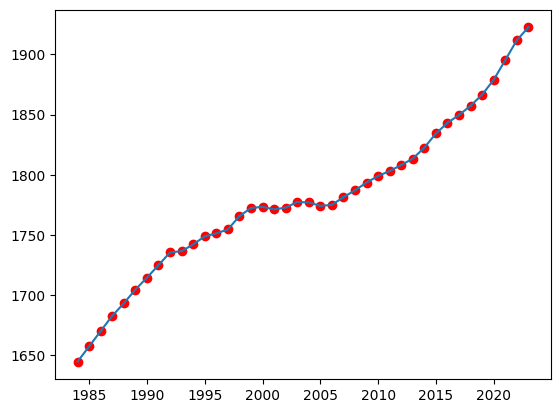

In [20]:
plt.figure()

x = CH4["year"]
y = CH4["mean"]
err = CH4["unc"]
plt.scatter(x,y, color = 'red')
plt.errorbar(x, y, yerr = err)
plt.show()

#errors are tiny so hard to see

In [21]:
def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

p0 = [1, 1, 1, 1] # a,b,c,d guesses (don't need to be that accurate since polynomial)

par, cov = fit.curve_fit(cubic, CH4["year"], CH4["mean"], p0)

In [22]:
par

array([ 1.23201298e-02, -7.40293258e+01,  1.48278668e+05, -9.89993027e+07])

In [23]:
cov

array([[ 1.86947837e-07, -1.12363432e-03,  2.25112533e+00,
        -1.50329598e+03],
       [-1.12363448e-03,  6.75353346e+00, -1.35302924e+04,
         9.03552619e+06],
       [ 2.25112597e+00, -1.35302943e+04,  2.71072097e+07,
        -1.81022488e+10],
       [-1.50329662e+03,  9.03552878e+06, -1.81022514e+10,
         1.20887600e+13]])

In [54]:
y = CH4["mean"]
x = CH4["year"]

chi2 = sum((y - cubic(x, par[0], par[1], par[2], par[3]))/CH4["unc"])**2
# divided by error then squared

In [55]:
chi2

33.396791719001904

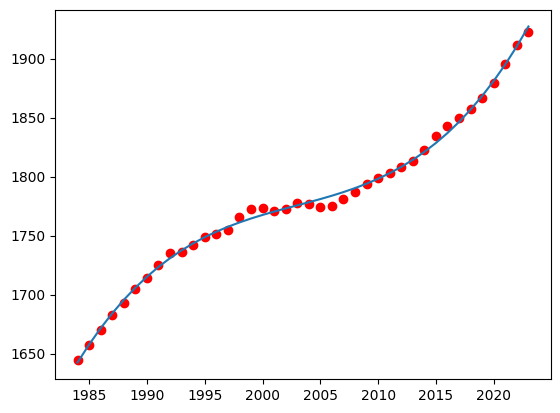

In [56]:
plt.figure()
plt.scatter(x,y, color = 'red')
plt.plot(x, cubic(x, par[0], par[1], par[2], par[3]))
plt.show()